<a href="https://colab.research.google.com/github/jidemaestri/Financial-Markets/blob/master/04_Markowitz_portfolio_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [2]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt


In [51]:
tickers = ["AAPL", "MSFT", "VALE", "MELI", "KO", "MCD", "NVDA", "PAM", "GGAL", "JPM", "TSM", "^GSPC", "^IXIC", "DIA"]


In [47]:
tickers_test = ["^GSPC", "^IXIC", "^DJI"]

In [48]:
tickers_test

['^GSPC', '^IXIC', '^DJI']

In [49]:
testing_tickers = yf.download(tickers_test, start="1991-01-01", end="2023-01-26")


[*********************100%***********************]  3 of 3 completed


#### Scrapping data

In [52]:
data = yf.download(tickers, start="1991-01-01", end="2023-01-26")


[*********************100%***********************]  14 of 14 completed


In [53]:
data["Adj Close"].head()


,AAPL,DIA,GGAL,JPM,KO,MCD,MELI,MSFT,NVDA,PAM,TSM,VALE,^GSPC,^IXIC
Date,,,,,,,,,,,,,,
1991-01-02 00:00:00-05:00,0.313172,NaN,NaN,1.425468,2.683746,3.797309,NaN,0.649350,NaN,NaN,NaN,NaN,326.450012,372.200012
1991-01-03 00:00:00-05:00,0.309572,NaN,NaN,1.425468,2.609608,3.747342,NaN,0.653694,NaN,NaN,NaN,NaN,321.910004,367.500000
1991-01-04 00:00:00-05:00,0.311372,NaN,NaN,1.441306,2.676332,3.763998,NaN,0.659123,NaN,NaN,NaN,NaN,321.000000,367.200012
1991-01-07 00:00:00-05:00,0.311372,NaN,NaN,1.377951,2.631850,3.647414,NaN,0.650436,NaN,NaN,NaN,NaN,315.440002,360.200012
1991-01-08 00:00:00-05:00,0.311372,NaN,NaN,1.377951,2.609608,3.664069,NaN,0.638491,NaN,NaN,NaN,NaN,314.899994,359.000000


#### Calculating daily returns

In [54]:
returns = data["Adj Close"].pct_change().dropna()


In [55]:
returns_pct = returns.mul(100)


In [56]:
returns_pct.tail()



,AAPL,DIA,GGAL,JPM,KO,MCD,MELI,MSFT,NVDA,PAM,TSM,VALE,^GSPC,^IXIC
Date,,,,,,,,,,,,,,
2023-01-19 00:00:00-05:00,0.044374,-0.702764,3.951619,-1.332655,-0.150477,-0.924681,0.357365,-1.645395,-3.521903,-0.815700,-1.195931,0.110806,-0.763835,-0.955920
2023-01-20 00:00:00-05:00,1.922075,1.004997,6.671836,0.244899,0.602814,1.896957,2.363105,3.574358,6.406207,4.173009,2.975110,0.276708,1.891840,2.655299
2023-01-23 00:00:00-05:00,2.350044,0.749243,-1.236364,1.621263,0.249663,0.264361,-0.281395,0.982433,7.590108,0.029235,5.086241,0.055178,1.188134,2.010519
2023-01-24 00:00:00-05:00,1.006306,0.276644,-0.368190,0.859614,0.531296,0.100260,1.361647,-0.222610,0.375137,0.350783,-1.149912,2.151138,-0.071150,-0.265219
2023-01-25 00:00:00-05:00,-0.470075,0.065263,3.843315,0.483928,0.627582,1.276155,1.867717,-0.590808,0.301065,2.942028,-2.273682,2.105828,-0.018173,-0.184478


##### Mean returns & Variance

In [57]:
mean_returns = np.mean(returns_pct)


In [58]:
var_returns = np.var(returns_pct)

In [59]:
mean_returns

AAPL     0.111956
DIA      0.051558
GGAL     0.095397
JPM      0.059486
KO       0.042298
MCD      0.065322
MELI     0.145532
MSFT     0.088550
NVDA     0.161614
PAM      0.080911
TSM      0.095720
VALE     0.052827
^GSPC    0.045800
^IXIC    0.058204
dtype: float64

In [60]:
df_portfolio = pd.DataFrame({'daily_mean':mean_returns, 'daily_var':var_returns})


In [61]:
df_portfolio

,daily_mean,daily_var
AAPL,0.111956,3.263092
DIA,0.051558,1.162135
GGAL,0.095397,11.952994
JPM,0.059486,3.225650
KO,0.042298,1.212458
MCD,0.065322,1.417541
MELI,0.145532,9.300263
MSFT,0.088550,2.669177
NVDA,0.161614,7.939299
PAM,0.080911,9.501375


In [62]:
returns_yr = returns.mean()*250

In [63]:
returns_yr

AAPL     0.279890
DIA      0.128894
GGAL     0.238493
JPM      0.148715
KO       0.105745
MCD      0.163305
MELI     0.363830
MSFT     0.221375
NVDA     0.404035
PAM      0.202278
TSM      0.239301
VALE     0.132068
^GSPC    0.114499
^IXIC    0.145511
dtype: float64

In [64]:
cov_daily = returns.cov()


In [65]:
cov_annual = cov_daily * 250


#### Creating lists for data storing

In [66]:
port_returns = []
port_volatility = []
stock_weights = []
sharpe_ratio = []

In [67]:
num_tickers = len(tickers)

In [68]:
num_port = 40000

In [69]:
risk_free_rate = 3/100

#### Efficient Frontier

In [70]:
# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_port):
    weights = np.random.random(num_tickers)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_yr)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility - risk_free_rate
    sharpe_ratio.append(sharpe)    
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)


In [71]:

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio
             }


In [72]:

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(tickers):
    portfolio[symbol+' weight'] = [weight[counter] for weight in stock_weights]


In [73]:

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' weight' for stock in tickers]

# reorder dataframe columns
df = df[column_order]

df.head()

,Returns,Volatility,Sharpe Ratio,AAPL weight,MSFT weight,VALE weight,MELI weight,KO weight,MCD weight,NVDA weight,PAM weight,GGAL weight,JPM weight,TSM weight,^GSPC weight,^IXIC weight,DIA weight
0,0.189086,0.211649,0.863397,0.048170,0.053553,0.062228,0.044941,0.103465,0.097457,0.031583,0.090122,0.065179,0.096307,0.011923,0.128207,0.032308,0.134557
1,0.206883,0.225943,0.885640,0.131985,0.027731,0.088395,0.018953,0.009420,0.048356,0.028161,0.113439,0.034358,0.129445,0.104075,0.099907,0.131302,0.034472
2,0.213282,0.226017,0.913655,0.062524,0.090621,0.089340,0.093878,0.004240,0.065748,0.055334,0.113858,0.106302,0.032058,0.041317,0.103721,0.039796,0.101263
3,0.216494,0.205102,1.025543,0.096558,0.103620,0.011982,0.097543,0.080517,0.113291,0.118845,0.125280,0.078225,0.061086,0.027611,0.015330,0.065638,0.004474
4,0.221188,0.232526,0.921241,0.057908,0.018407,0.050701,0.009908,0.074897,0.137285,0.120217,0.028885,0.126073,0.102796,0.016761,0.154544,0.076396,0.025222


#### Plots & Results

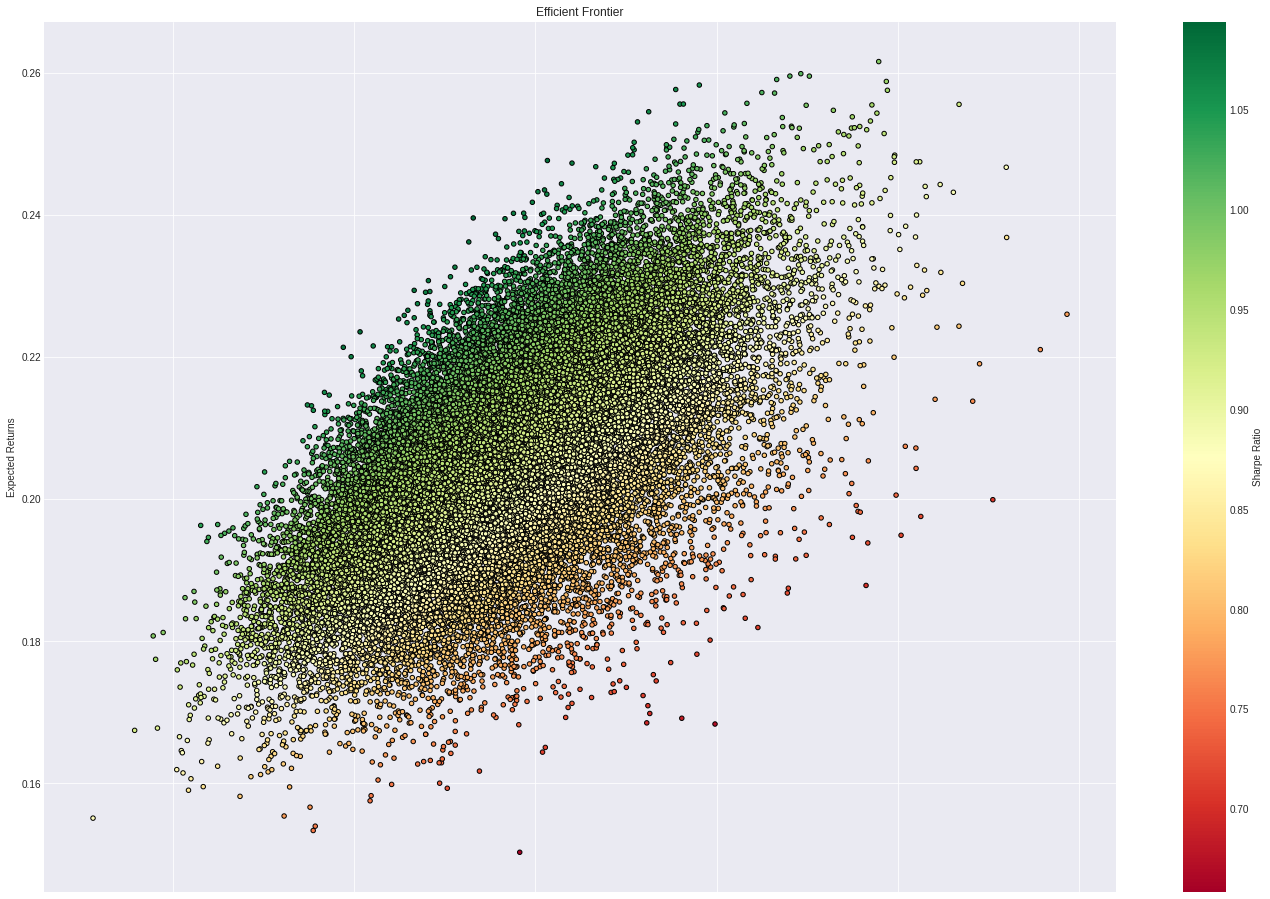

In [74]:
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(24, 16), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [75]:
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

In [76]:
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]

In [77]:
sharpe_portfolio

,Returns,Volatility,Sharpe Ratio,AAPL weight,MSFT weight,VALE weight,MELI weight,KO weight,MCD weight,NVDA weight,PAM weight,GGAL weight,JPM weight,TSM weight,^GSPC weight,^IXIC weight,DIA weight
13087,0.239578,0.213145,1.094014,0.163914,0.020937,0.005803,0.052482,0.083009,0.115174,0.071177,0.12626,0.141331,0.032913,0.107575,0.00401,0.020213,0.055203


In [78]:
min_variance_port

,Returns,Volatility,Sharpe Ratio,AAPL weight,MSFT weight,VALE weight,MELI weight,KO weight,MCD weight,NVDA weight,PAM weight,GGAL weight,JPM weight,TSM weight,^GSPC weight,^IXIC weight,DIA weight
10396,0.155124,0.171181,0.876199,0.016739,0.071472,0.018576,0.100649,0.188776,0.178032,0.000728,0.027631,0.009777,0.043184,0.09047,0.033336,0.142861,0.077769


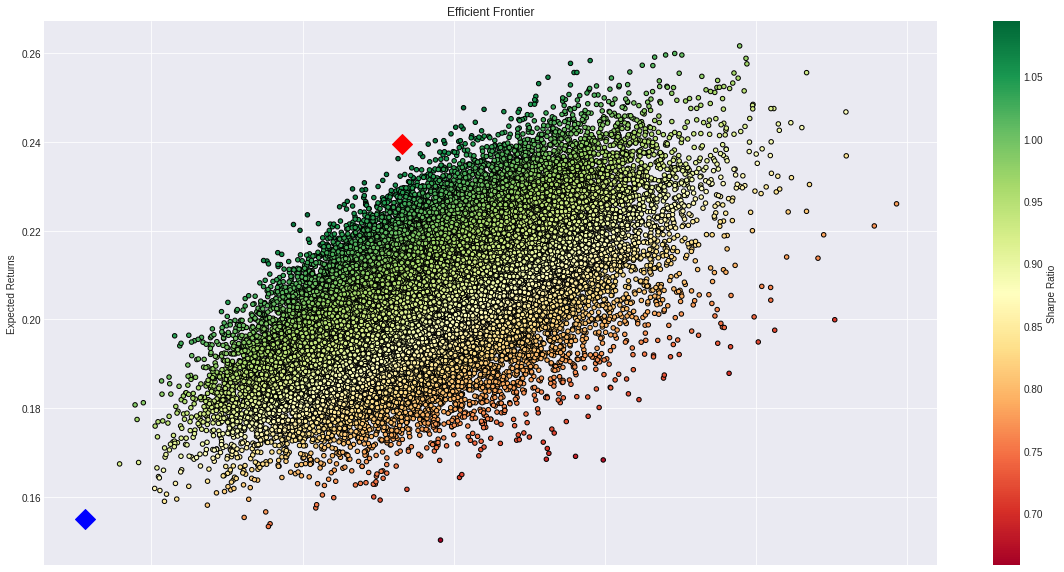

In [79]:
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(20, 10), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200 )
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()